In [32]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import asyncio
import numpy as np


LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [345]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2022-05-20 15:22:44,936 | INFO     |: Already connected to a BLE device


In [346]:
# Instantiate RobotControl class (in controller.py)
from controller import *

In [347]:
rc = RobotControl(ble)

ValueError: Characteristic notifications already started

In [218]:
rc.start_pid()

In [219]:
rc.stop_pid()

In [348]:
rc.stunt()

In [349]:
rc.stop_recording()

In [250]:
rc.latest_front_tof_reading

3717.0

In [204]:
# Start spinning!
rc.spin_360(95)

In [178]:
# Make sure to call this after the spin motion stops. This terminates data collection.
rc.stop_recording()

In [191]:
sr = deque([
       (200, '10.0'),
       (200, '10.0'),
       (200, '10.1'),
       (200, '10.1'),
       (200, '10.2'),
       (200, '10.3'),
       (200, '10.3'),
       (200, '10.4'),
       (200, '10.4'),
       (200, '10.5'),
       (200, '10.6'),
       (200, '10.7'),
       (200, '10.8'),
       (200, '10.9'),
       (200, '11.0'),
       (200, '11.0'),
       (200, '11.1'),
       (200, '11.1'),
       (200, '11.2'),
       (200, '11.3'),
       (200, '11.3'),
       (200, '11.4'),
       (200, '11.4'),
       (200, '11.5'),
       (200, '11.6'),
       (200, '11.7'),
       (200, '11.8'),
       (200, '11.9'),
       (200, '12.0'),
       (200, '12.0'),
       (200, '12.1'),
       (200, '12.1'),
       (200, '12.2'),
       (-200, '12.3'),
       (-200, '12.3'),
       (-200, '12.4'),
       (-200, '12.4'),
       (-200, '12.5'),
       (-200, '12.6'),
       (-200, '12.7'),
       (-200, '12.8'),
       (-200, '12.9'),
       (-200, '13.0'),
       (-200, '13.1'),
       (-200, '13.1'),
       (-200, '13.2'),
       (-200, '13.3'),
       (0, '13.3'),
       (0, '13.4'),
       (0, '13.4'),
       (0, '13.5'),
       (0, '13.6'),
       (0, '13.7'),
       (0, '13.7'),
       (0, '13.8'),
       (-200, '13.8'),
       (-200, '13.8'),
       (-200, '13.9'),
       (-200, '13.9'),
       (-200, '14.0'),
       (-200, '14.1'),
       (-200, '14.1'),
       (-200, '14.2')])

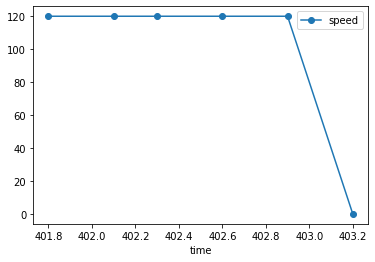

In [373]:
# speed_readings = np.array([(float(r[1]), r[0] * 1.275) for r in sr])
speed_readings = np.array([(float(r[1]), r[0]) for r in rc.speed_readings])

def plot_speed(ndarr):
    cols = ["time", "speed"]
    # df = pd.DataFrame(ndarr[:, [0, 2, 8]], columns=cols)
    df = pd.DataFrame(ndarr[:, :], columns=cols)
    df.plot(x=cols[0], y=cols[1:], marker="o")
    plt.savefig('pwm_values.png', bbox_inches='tight')
    plt.show()
    
    return df

pwm = plot_speed(speed_readings)

# Collect & display the full sensor data
# speed_cols = [
#     "time", "speed"
# ]
# speed_data = pd.DataFrame(rc.speed_readings, columns=cols)

In [374]:
pwm

,time,speed
0,401.8,120.0
1,402.1,120.0
2,402.3,120.0
3,402.6,120.0
4,402.9,120.0
5,403.2,0.0


In [351]:
# Collect & display the full sensor data
cols = [
    "time", "dist_r", "dist_f", "acc_x", "acc_y", "acc_z", "gyr_x",
    "gyr_y", "gyr_z", "mag_x", "mag_y", "mag_z", "temp"
]
sensor_data = pd.DataFrame(rc.sensor_arr, columns=cols)

In [386]:
sensor_data

,time,dist_r,dist_f,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,temp
0,401.652,451.0,2909.0,-20.507,-17.890,1072.265,1.633,0.633,1.700,271.350,-1135.349,159.449,28.508
1,401.893,450.0,2882.0,508.300,-28.320,806.640,-6.862,2.725,-4.992,336.299,-1163.250,238.199,28.413
2,402.178,452.0,2886.0,-365.722,450.683,1063.476,39.938,-12.977,11.549,247.500,-1098.150,219.000,28.317
3,402.433,448.0,2722.0,359.863,-916.503,-778.808,-6.755,2.267,5.931,297.149,-1098.449,108.750,28.700
4,402.718,398.0,2346.0,209.472,-1532.226,1999.938,8.366,-27.557,2.564,262.500,-1092.000,108.449,28.508
5,402.973,762.0,1912.0,-1493.652,1012.207,1999.938,76.419,70.694,55.786,222.449,-1092.750,142.949,28.508
6,403.228,893.0,1351.0,1288.574,152.343,-383.789,20.526,-29.366,33.969,249.600,-1097.550,114.900,28.221
7,403.468,547.0,783.0,-1302.246,570.312,-378.906,42.694,-50.885,-13.679,259.200,-1107.750,119.699,28.365
8,403.709,425.0,398.0,-2000.000,-2000.000,1999.938,220.961,-250.137,-37.419,268.500,-1101.599,139.500,28.317
9,403.933,649.0,59.0,1221.679,888.183,131.835,17.664,-26.145,-74.977,268.950,-1145.699,124.800,28.413


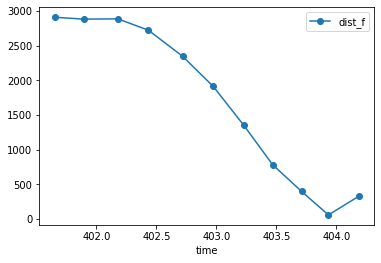

In [367]:
# Currently, only configured to plot the "gyr_z" values
# plot_sensor_data(rc.sensor_arr, save_path="front_tof_values.png")
dist_f = plot_sensor_data(rc.sensor_arr)

In [370]:
dist_f

,time,dist_f
0,401.652,2909.0
1,401.893,2882.0
2,402.178,2886.0
3,402.433,2722.0
4,402.718,2346.0
5,402.973,1912.0
6,403.228,1351.0
7,403.468,783.0
8,403.709,398.0
9,403.933,59.0


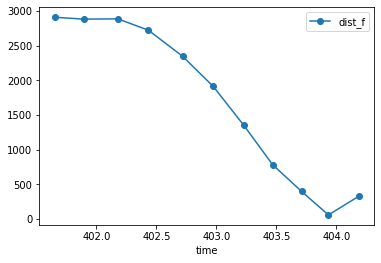

In [371]:
plot_df(dist_f)

In [366]:
vel_f = convert_dist_to_vel(dist_f)

In [368]:
vel_f

,time,vel_f
1,401.893,-112.033195
2,402.178,14.035088
3,402.433,-643.137255
4,402.718,-1319.298246
5,402.973,-1701.960784
6,403.228,-2200.000000
7,403.468,-2366.666667
8,403.709,-1597.510373
9,403.933,-1513.392857
10,404.188,1062.745098


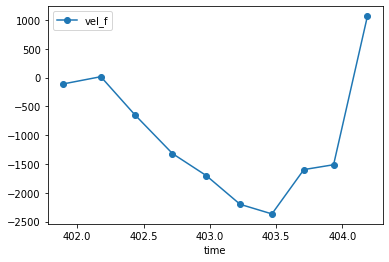

In [369]:
plot_df(vel_f)

In [375]:
pwm

,time,speed
0,401.8,120.0
1,402.1,120.0
2,402.3,120.0
3,402.6,120.0
4,402.9,120.0
5,403.2,0.0


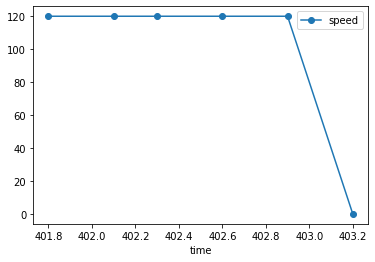

In [376]:
plot_df(pwm)

In [381]:
new_pwm = dist_f.copy()
new_pwm["pwm"] = new_pwm.apply(lambda row: 120.0 if row["time"] < 403.2 else 0.0, axis=1)
new_pwm.drop(columns=["dist_f"], inplace=True)

In [384]:
new_pwm

,time,pwm
0,401.652,120.0
1,401.893,120.0
2,402.178,120.0
3,402.433,120.0
4,402.718,120.0
5,402.973,120.0
6,403.228,0.0
7,403.468,0.0
8,403.709,0.0
9,403.933,0.0


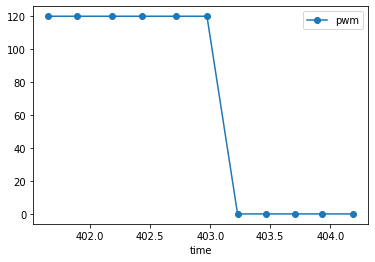

In [385]:
plot_df(new_pwm)

In [388]:
gyr_z = pd.DataFrame(rc.sensor_arr[:, [0, 8]], columns=["time", "gyr_z"])

In [389]:
gyr_z

,time,gyr_z
0,401.652,1.700
1,401.893,-4.992
2,402.178,11.549
3,402.433,5.931
4,402.718,2.564
5,402.973,55.786
6,403.228,33.969
7,403.468,-13.679
8,403.709,-37.419
9,403.933,-74.977


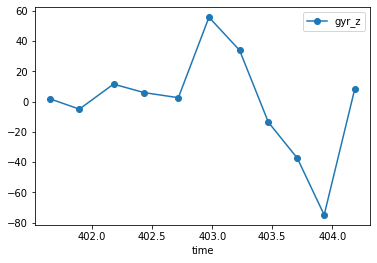

In [390]:
plot_df(gyr_z)

In [430]:
dist_f["time"].diff().mean()

0.25360000000000016

2022-05-20 16:29:46,382 | INFO     |: Disconnected from C41C2988-2D80-83DC-22C0-8EF57D41E2E4


In [397]:
# Initial state uncertainty 
sig = np.array([[5**2,0],[0,5**2]])

d = 4e-4   # drag
m = 2.61e-4 # mass

# A, B, C matrices
A = np.array([[0,1],[0,-d/m]])
B = np.array([[0],[1/m]])
C = np.array([[-1,0]])

# Process and sensor noise
sig_u = np.array([[10**2,0],[0,10**2]])
sig_z = np.array([[20**2]])

# Discretize A and B
delta_t = dist_f["time"].diff().mean()
Ad = np.eye(2) + delta_t * A
Bd = delta_t * B

# Initial state
x = np.array([[-dist_f["dist_f"][0]],[0]])

# KF estimation
def kf(x,u,sig,y):
    
    x_p = Ad.dot(x) + Bd.dot(u)                      # predicted state
    sig_p = Ad.dot(sig.dot(Ad.transpose())) + sig_u  # predicted state uncertainty
    
    y_m = y-C.dot(x_p)
    sig_m = C.dot(sig_p.dot(C.transpose())) + sig_z
    
    kf_gain = sig_p.dot(C.transpose().dot(np.linalg.inv(sig_m)))  # KF gain

    x_n   = x_p + kf_gain.dot(y_m)                   # new state 
    sig_n = (np.eye(2) - kf_gain.dot(C)).dot(sig_p)  # new state uncertainty

    return x_n, sig_n

In [398]:
# Run code
kf_state = []
for u, d in zip(new_pwm["pwm"], dist_f["dist_f"]):
    x, sig = kf(x, [[u/80]], sig, [[d]])
    kf_state.append(x[:,0])

In [422]:
kf_df = dist_f.copy()
kf_df.drop(columns=["dist_f"], inplace=True)
temp_kf_df = pd.DataFrame(kf_state, columns=["new_dist_f", "new_vel_f"])
kf_df = pd.concat((kf_df, temp_kf_df), axis=1)

In [423]:
kf_df

,time,new_dist_f,new_vel_f
0,401.652,-2909.000000,1457.471264
1,401.893,-2655.362562,2337.860943
2,402.178,-2379.775148,2849.583834
3,402.433,-2089.064772,3145.029858
4,402.718,-1728.046975,3323.764277
5,402.973,-1313.658909,3433.715398
6,403.228,-823.000103,2049.686257
7,403.468,-504.267044,1226.881085
8,403.709,-279.019542,738.862671
9,403.933,-77.956310,453.478537


In [424]:
kf_df.drop(columns=["time"], inplace=True)
new_kf_df = pd.concat((dist_f, kf_df), axis=1)
new_kf_df["new_dist_f"] *= -1

In [428]:
# Optional to combine orig vel data
new_kf_df.drop(columns=["time"], inplace=True)
new_kf_df = pd.concat((vel_f, new_kf_df), axis=1)
new_kf_df["vel_f"] *= -1

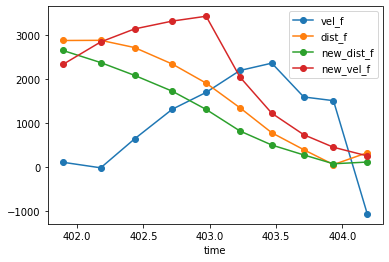

In [429]:
plot_df(new_kf_df, "kf_with_orig_dist_vel3.png")

In [39]:
# This is where we do the polar plot stuff...
import math
from matplotlib import pyplot as plt

[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265 3.4906585  3.83972435
 4.1887902  4.53785606 4.88692191 5.23598776 5.58505361 5.93411946]
Actual number of data points (including the excluded latter points collected after spin stopped): 23

Plot data:
Time: [3.186, 3.877, 4.536, 5.122, 5.722, 6.307, 6.862, 7.462, 8.031, 8.617, 9.217, 9.786, 10.357, 10.941, 11.541, 12.126, 12.711, 13.267]
Distance: [101.0, 110.0, 146.0, 150.0, 103.0, 83.0, 80.0, 96.0, 147.0, 219.0, 197.0, 195.0, 216.0, 283.0, 216.0, 174.0, 163.0, 179.0]
Angle (rad):  ['0.00', '0.35', '0.70', '1.05', '1.40', '1.75', '2.09', '2.44', '2.79', '3.14', '3.49', '3.84', '4.19', '4.54', '4.89', '5.24', '5.59', '5.93']


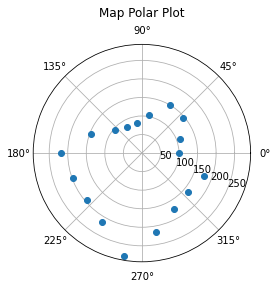

In [54]:
times = list(sensor_data["time"][:18])
tofs = sensor_data["dist_f"][:18]
ang_vels = list(sensor_data["gyr_z"])
# ang_vels = list(np.tile(np.array([22.5]), len(tofs)))
num_points = len(ang_vels)

# thetas = [0]
# for i in range(1, num_points):
#     thetas.append(thetas[i-1] + math.radians(ang_vels[i] * (times[i] - times[i-1])))
thetas = np.linspace(0, 2 * np.pi, len(tofs), endpoint=False)
print(thetas)

xs = np.cos(thetas) * tofs
ys = np.sin(thetas) * tofs

r = np.array(tofs)
theta = np.array(thetas)

print(f"Actual number of data points (including the excluded latter points collected after spin stopped): {num_points}\n")

print("Plot data:")
print(f"Time: {repr(times)}")
print(f"Distance: {repr(list(r))}")
print("Angle (rad): ", ["{:0.2f}".format(x) for x in theta ])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r, 'o')
# ax.set_rmax(2000)
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Map Polar Plot", va='bottom')
plt.show()

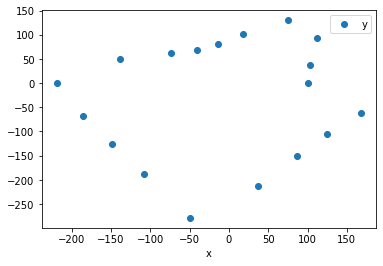

In [55]:
df = pd.concat([xs.rename("x"), ys.rename("y")], axis=1)
df.plot(x="x", y="y", marker="o", linestyle='none')
plt.show()

In [47]:
ble.disconnect()

2022-05-13 16:03:27,560 | INFO     |: Disconnected from B45C71B2-3BCA-639D-7AF3-3C14C2003C3E


In [431]:
import dill
dill.dump_session('notebook_env.db')

TypeError: Cannot pickle Objective-C objects